In [1]:
import pandas as pd

# Load the datasets
applications_df = pd.read_csv('cleaned_applications.csv')
branches_df = pd.read_csv('cleaned_branches.csv')
customers_df = pd.read_csv('cleaned_customers.csv')
defaults_df = pd.read_csv('cleaned_defaults.csv')
loans_df = pd.read_csv('cleaned_loans.csv')
transactions_df = pd.read_csv('cleaned_transactions.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [2]:
applications_customers_df = pd.merge(applications_df, customers_df, on='Customer_ID', how='left')
applications_branches_df = pd.merge(applications_customers_df, branches_df, on='Region', how='left')

In [3]:
rejected_applications_df = applications_branches_df[applications_branches_df['Approval_Status'] == 'Rejected']
rejected_applications_by_branch = rejected_applications_df.groupby('Branch_Name').size().reset_index(name='Rejected_Application_Count')
sorted_rejected_applications = rejected_applications_by_branch.sort_values(by='Rejected_Application_Count', ascending=False)
display(sorted_rejected_applications)

Branch_Name  Rejected_Application_Count
25          Kapadia-Ramakrishnan                        2184
15          Dhar, Kant and Madan                        2184
28                      Kaul Inc                        2184
26                     Kar-Jaggi                        2184
1                       Arya Ltd                        2184
13              Contractor-Sodhi                        2184
48                      Yogi Ltd                        2112
45                    Vasa Group                        2112
40                     Sani-Kale                        2112
32                   Madan-Lanka                        2112
30          Lad, Wali and Ramesh                        2112
29        Khalsa, Mani and Banik                        2112
18                     Doshi LLC                        2112
17                   Doshi Group                        2112
16                   Dhingra Ltd                        2112
0                     Apte Group                        2112
14       Dada, Chander and Bhatt                        2112
3    Banik, Subramanian and Mane                        2112
5                     Bath-Bassi                        2112
9            Bhatti, Rau and Sem                        2112
7                     Bhakta PLC                        2107
47       Wable, Butala and Kakar                        2107
46               Viswanathan Ltd                        2107
43                  Solanki-Shah                        2107
41                       Sem Inc                        2107
38          Saini, Iyer and Sani                        2107
35        Mangal, Kaur and Borde                        2107
49  Zacharia, Srivastava and Sha                        2107
39    Sandhu, Magar and Sachdeva                        2084
31                      Loke Inc                        2084
19                      Dyal PLC                        2084
33             Mahajan-Zachariah                        2084
22                  Grover Group                        2075
23                   Kakar-Dutta                        2075
42                    Shan Group                        2075
12                 Chawla-Tandon                        2075
4   Bansal, Arya and Chakrabarti                        2075
27                     Kara-Bahl                        2075
8   Bhatnagar, Khalsa and Savant                        2075
24                  Kapadia-Brar                        2075
37              Sachdev-Banerjee                        2038
36         Raja, Ratta and Sathe                        2038
34  Malhotra, Boase and Malhotra                        2038
21                     Garde PLC                        2038
44    Uppal, Sankaran and Thaker                        2038
20                     Gala-Gara                        2038
6                       Bawa Inc                        2038
11            Chawla-Subramanian                        2038
2                    Badal Group                        2038
10       Borah, Comar and Bhalla                        2038

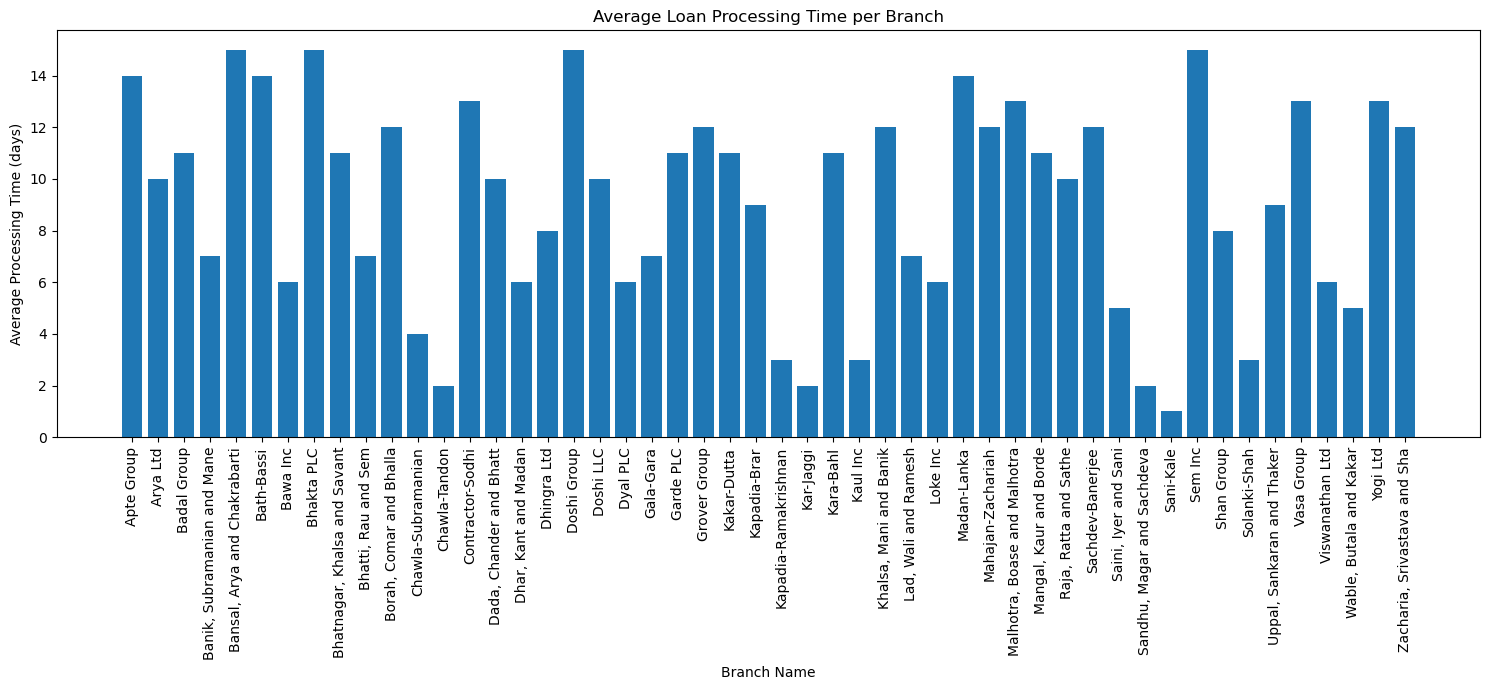

In [4]:
import matplotlib.pyplot as plt

average_processing_time_by_branch = applications_branches_df.groupby('Branch_Name')['Avg_Processing_Time'].mean().reset_index()

plt.figure(figsize=(15, 7))
plt.bar(average_processing_time_by_branch['Branch_Name'], average_processing_time_by_branch['Avg_Processing_Time'])
plt.xlabel('Branch Name')
plt.ylabel('Average Processing Time (days)')
plt.title('Average Loan Processing Time per Branch')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

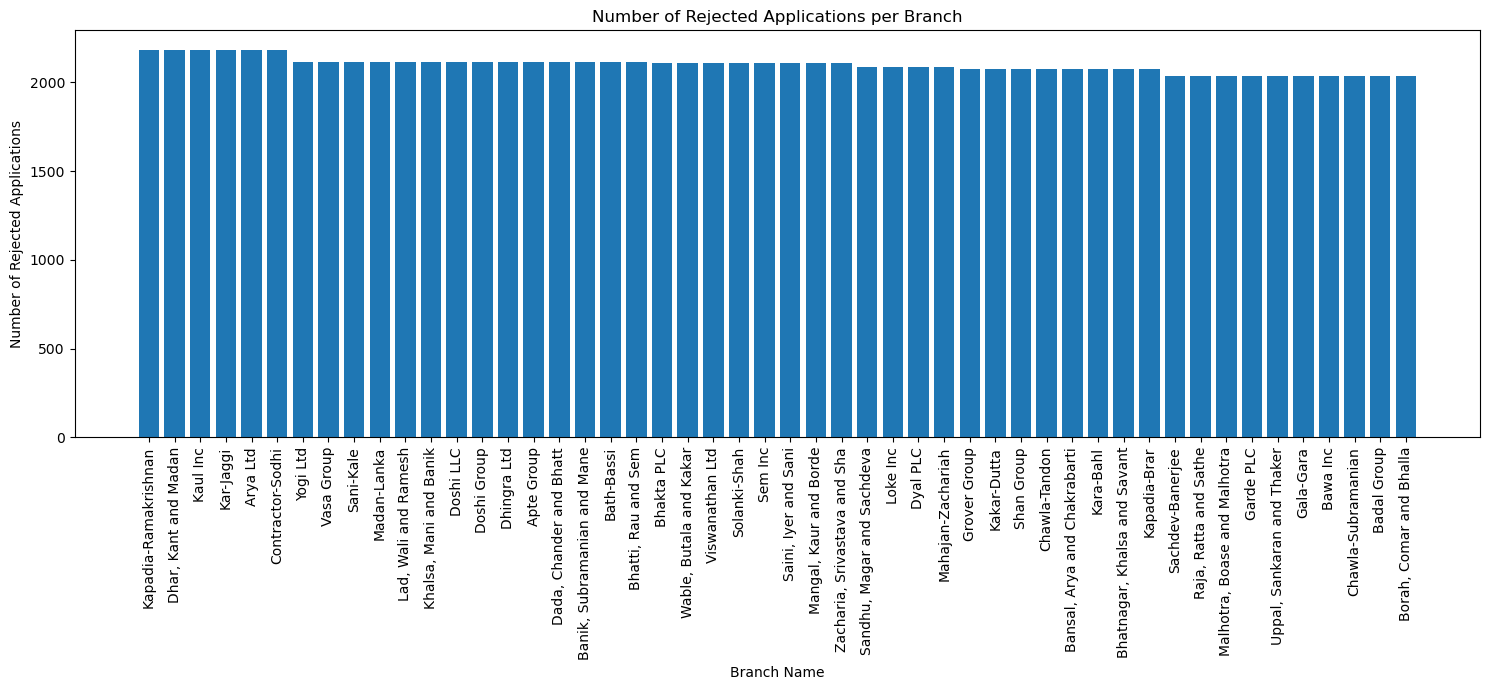

In [5]:
plt.figure(figsize=(15, 7))
plt.bar(sorted_rejected_applications['Branch_Name'], sorted_rejected_applications['Rejected_Application_Count'])
plt.xlabel('Branch Name')
plt.ylabel('Number of Rejected Applications')
plt.title('Number of Rejected Applications per Branch')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()